In [1]:
# Loading Libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [3]:
chicago_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Chicago_Crime_Detective.csv")
chicago_data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [8]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           191641 non-null  int64         
 1   ID                   191641 non-null  int64         
 2   Date                 191641 non-null  datetime64[ns]
 3   LocationDescription  191641 non-null  object        
 4   Arrest               191641 non-null  bool          
 5   Domestic             191641 non-null  bool          
 6   Beat                 191641 non-null  int64         
 7   District             148589 non-null  object        
 8   CommunityArea        167038 non-null  object        
 9   Year                 191641 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(4), object(3)
memory usage: 12.1+ MB


In [7]:
chicago_data["Date"] = pd.to_datetime(chicago_data["Date"])

In [12]:
import math

median = math.floor(chicago_data["Date"].astype('int64').median())
result = np.datetime64(median, "ns")
result

numpy.datetime64('2006-05-21T12:30:00.000000000')

In [14]:
year_value = chicago_data.groupby("Year")

In [18]:
year_value["Year"]

In [55]:
crime_value = chicago_data["Year"].value_counts()
crime_value

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

In [56]:
type(crime_value)

pandas.core.series.Series

In [57]:
crime_value[2009]

12167

In [62]:
crime_value.sort_index()

2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: Year, dtype: int64

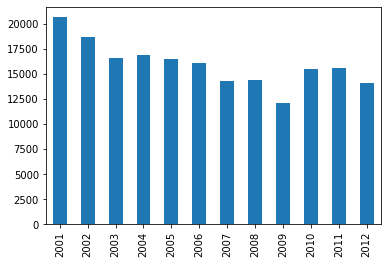

In [64]:
crime_value.sort_index().plot.bar()

In [26]:
#chicago_data["Month"] = chicago_data["Date"]
chicago_data['Month'] = pd.DatetimeIndex(chicago_data["Date"]).month
chicago_data['Month'].head()

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: Month, dtype: int64

In [27]:
chicago_data['Month'].tail()

191636    1
191637    1
191638    1
191639    1
191640    1
Name: Month, dtype: int64

In [28]:
chicago_data['Month'].value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

In [29]:
min(chicago_data['Month'].value_counts())

13511

In [31]:
chicago_data['Weekday'] = pd.to_datetime(chicago_data['Date']).apply(lambda x: x.weekday())

In [32]:
chicago_data['Weekday'].head()

0    0
1    0
2    0
3    0
4    0
Name: Weekday, dtype: int64

In [33]:
chicago_data['Weekday'].tail()

191636    0
191637    0
191638    0
191639    0
191640    0
Name: Weekday, dtype: int64

In [34]:
chicago_data['Weekday'].value_counts()

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: Weekday, dtype: int64

In [ ]:
#The day of the week with Monday=0, Sunday=6.

In [37]:
min(chicago_data['Weekday'].value_counts())

26316

In [36]:
sorted(chicago_data['Weekday'].value_counts())

[26316, 26791, 27118, 27319, 27397, 27416, 29284]

In [38]:
chicago_data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [39]:
chicago_data["Arrest"].value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

In [40]:
Month_value = chicago_data.groupby("Month")

In [44]:
Month_value["Arrest"].value_counts()

Month  Arrest
1      False     14612
       True       1435
2      False     12273
       True       1238
3      False     14460
       True       1298
4      False     14028
       True       1252
5      False     14848
       True       1187
6      False     14772
       True       1230
7      False     15477
       True       1324
8      False     15243
       True       1329
9      False     14812
       True       1248
10     False     15744
       True       1342
11     False     14807
       True       1256
12     False     15029
       True       1397
Name: Arrest, dtype: int64

In [ ]:
year_value = chicago_data.groupby("Year")

In [65]:
year_value["Arrest"].value_counts()

Year  Arrest
2001  False     18517
      True       2152
2002  False     16638
      True       2115
2003  False     14859
      True       1798
2004  False     15169
      True       1693
2005  False     14956
      True       1528
2006  False     14796
      True       1302
2007  False     13068
      True       1212
2008  False     13425
      True       1020
2009  False     11327
      True        840
2010  False     14796
      True        701
2011  False     15012
      True        625
2012  False     13542
      True        550
Name: Arrest, dtype: int64

In [ ]:
10579
4948
20669
14280

In [70]:
chicago_data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [79]:
chicago_data["LocationDescription"].value_counts().nlargest(10)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
RESIDENTIAL YARD (FRONT/BACK)       1536
RESIDENCE                           1302
RESIDENCE-GARAGE                    1176
VACANT LOT/LAND                      985
Name: LocationDescription, dtype: int64

In [80]:
Top5 =  chicago_data[chicago_data["LocationDescription"] == "STREET"]
Top5.shape

(156564, 12)

In [81]:
gas_station = chicago_data[chicago_data["LocationDescription"] == "GAS STATION"]
gas_station

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
13,13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,12,0
106,106,8948353,2012-12-29 10:00:00,GAS STATION,False,False,823,8,66,2012,12,5
213,213,8945802,2012-12-27 10:00:00,GAS STATION,False,False,321,3,42,2012,12,3
278,278,8943877,2012-12-25 10:00:00,GAS STATION,False,False,332,3,43,2012,12,1
290,290,8943595,2012-12-24 21:55:00,GAS STATION,False,False,421,4,43,2012,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191335,191335,1323645,2001-01-06 16:00:00,GAS STATION,False,False,623,NaN,NaN,2001,1,5
191350,191350,1319694,2001-01-06 11:30:00,GAS STATION,False,False,2533,NaN,NaN,2001,1,5
191376,191376,1356080,2001-01-05 22:00:00,GAS STATION,False,False,632,NaN,NaN,2001,1,4
191562,191562,1313797,2001-01-02 18:10:00,GAS STATION,False,False,523,NaN,NaN,2001,1,1


In [82]:
gas_station["Weekday"].value_counts()

5    338
6    336
4    332
3    282
0    280
2    273
1    270
Name: Weekday, dtype: int64

In [12]:
Top5 =  chicago_data[chicago_data["LocationDescription"] == "DRIVEWAY - RESIDENTIAL"]
Top5.shape

(1675, 10)

In [7]:
chicago_data["LocationDescription"].value_counts().nlargest(10)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
RESIDENTIAL YARD (FRONT/BACK)       1536
RESIDENCE                           1302
RESIDENCE-GARAGE                    1176
VACANT LOT/LAND                      985
Name: LocationDescription, dtype: int64